<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_Dogs_and_Cats_VGG16_Fine_Tuning_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 학습된 CNN(VGG-16)을 이용한 Fine Tunig 
##VGG-16 Model

* University of Oxford - Visual Geometry Group 
* 2014 ILSVRC 2nd Model 
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

In [1]:
import warnings 
warnings.filterwarnings('ignore')

## 0.Import Keras

In [2]:
import keras 

keras.__version__

'2.4.3'

## 1.Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [3]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


### 1) 구글 드라이브 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


### 2) unzip 'dogs_and_cats_small.zip'

In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [6]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 24 07:09 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 24 07:09 test
drwxr-xr-x 4 root root 4096 Mar 24 07:09 train
drwxr-xr-x 4 root root 4096 Mar 24 07:09 validation


## 2.Image_File Directory Setting
* train_dir 
* valid_dir 
* test_dir

In [7]:
train_dir = 'train' 
valid_dir = 'validation' 
test_dir = 'test'

## 3.Data Preprocessing

### 1) ImageDataGenerator( ) & flow_from_directory()
* Normalization
  * ImageDataGenerator( )
* Resizing & Generator
  * flow_from_directory()

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory( 
    valid_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##.Import VGG-16 Model & Some Layers Freezing 

### 1) conv_base

In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', 
                  include_top = False, 
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


### 2) Model Information

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 3) 'block5_conv1' Freezing
* Before 'weight' Freezing

In [11]:
#총 파라미터 갯수
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류: 26


* 'weight' Freezing

In [12]:
#고정 : 9개 layer
set_trainable = False

for layer in conv_base.layers: 
  if layer.name == 'block5_conv1': 
    set_trainable = True

  if set_trainable: 
    layer.trainable = True
  else: 
    layer.trainable = False

* After 'weight' Freezing

In [13]:
#마지막 3개만 tuning
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 6


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## 5.Keras CNN Modeling with VGG-16 Freezed Layers

### 1) Model Define'
* 'conv_base' & 'Classification' Network
* Dropout Layer

In [15]:
#conv_base에 튜닝레이어를 연결conv_base에 튜닝레이어를 연결
from keras import models, layers

model = models.Sequential() 
model.add(conv_base)

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation = 'relu')) 
model.add(layers.Dropout(0.4)) 
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


### 2) Model Compile

* 모델 학습방법 설정 
  * 이미 학습된 Weight 값을 Tuning 
  * 매우 작은 Learnig Rate 지정 
  * optimizers.Adam(lr = 0.000005)

In [17]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005), 
              metrics = ['accuracy'])

### 3) Model Fit

In [18]:
%%time
Hist_dandc = model.fit(train_generator, 
                       steps_per_epoch = 100, 
                       epochs = 100,
                       validation_data = valid_generator, 
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 46s 115ms/step - loss: 0.8029 - accuracy: 0.5464 - val_loss: 0.4639 - val_accuracy: 0.8350
Epoch 2/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4515 - accuracy: 0.7988 - val_loss: 0.3381 - val_accuracy: 0.8570
Epoch 3/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3207 - accuracy: 0.8617 - val_loss: 0.2653 - val_accuracy: 0.8880
Epoch 4/100
100/100 [==============================] - 11s 111ms/step - loss: 0.2562 - accuracy: 0.8941 - val_loss: 0.2371 - val_accuracy: 0.8970
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1849 - accuracy: 0.9283 - val_loss: 0.2305 - val_accuracy: 0.9010
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1591 - accuracy: 0.9317 - val_loss: 0.2209 - val_accuracy: 0.9040
Epoch 7/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1224 - accuracy: 0.9568 - val_loss: 0.2026 -

### 4) 학습 결과 시각화
* Loss Visualization

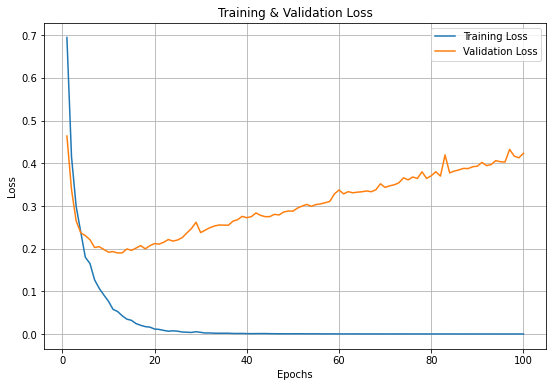

In [19]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['loss']) 
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid()
plt.show()

* Accuracy Visualization

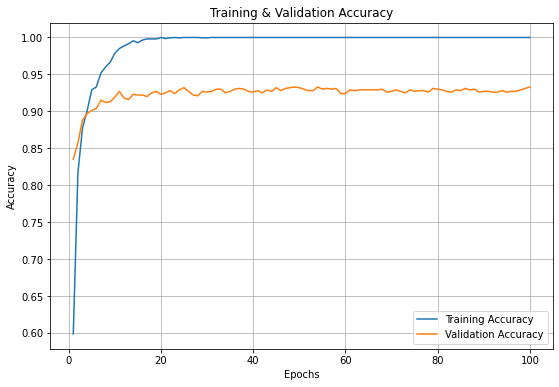

In [20]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['accuracy']) 
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

### 5) Model Evaluate
* test_generator

In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [22]:
loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 67ms/step - loss: 0.3942 - accuracy: 0.9300
Loss = 0.39423
Accuracy = 0.93000


## 4.Model Save & Load to Google Drive

### 1) Google Drive Mount

In [23]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Model Save

In [24]:
model.save('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_fine_tuning.h5')

In [25]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 440289
-rw------- 1 root root     34592 Mar 17 07:50 001_Model_iris.h5
-rw------- 1 root root  41498896 Mar 23 02:25 002_dogs_and_cats_small.h5
-rw------- 1 root root  41499744 Mar 23 06:22 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  25199032 Mar 24 05:11 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:29 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root 201873880 Mar 24 07:23 006_dogs_and_cats_VGG16.h5


### 3) Model Load

In [26]:
from keras.models import load_model 

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_fine_tuning.h5')

In [27]:
loss, accuracy = model_google.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 72ms/step - loss: 0.3942 - accuracy: 0.9300
Loss = 0.39423
Accuracy = 0.93000


본 내용은 2021/03/24(수)에 학습한 내용입니다.